Code to simulate finite system size dynamics for the main script with the mean-field results

In [2]:
from qutip import *
import qutip.piqs as piqs
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({
    # LaTeX rendering and font configuration
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],  # mathpazo corresponds to Palatino font
    "font.size": 18,  # Base font size
    
    # Font sizes for specific elements
    "axes.titlesize": 30,        # Axis title
    "axes.labelsize": 30,         # Axis labels
    "xtick.labelsize": 24,        # X-ticks
    "ytick.labelsize": 24,        # Y-ticks
    "legend.fontsize": 24,        # Legend
    "figure.titlesize": 24,       # Figure title
    
    # LaTeX preamble packages
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{amsfonts}
        \usepackage{amssymb}
        \usepackage{lmodern}
        \usepackage{mathpazo}
    """
})

In [70]:
# Parameters
N_A=N_B= 5
N=N_A+N_B               # Number of spins
###Original parameters
kappa = 1.0
g = 0.1*kappa
Deltac = 0.01
eta = 1*g
chi = 1/(kappa/2 - 1j*Deltac)
#Rescaled
Gamma = 4*g**2/kappa
Xi = 2*g*eta/kappa
Cm = Deltac*g*g*abs(chi)**2
DeltaA = 0 
DeltaB = 0

ϕ = np.pi*2/3        # Phase factor


In [71]:

Jp_A=tensor(jmat(int(N_A),'+'),qeye(int(2*N_B+1)))
Jm_A=tensor(jmat(int(N_A),'-'),qeye(int(2*N_B+1)))
Jx_A=tensor(jmat(int(N_A),'x'),qeye(int(2*N_B+1)))
Jy_A=tensor(jmat(int(N_A),'y'),qeye(int(2*N_B+1)))
Jz_A=tensor(jmat(int(N_A),'z'),qeye(int(2*N_B+1)))

Jp_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'+'))
Jm_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'-'))
Jx_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'x'))
Jy_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'y'))
Jz_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'z'))


Jp=Jp_A+Jp_B
Jm=Jm_A+Jm_B
Jx=Jx_A+Jx_B
Jy=Jy_A+Jy_B
Jz=Jz_A+Jz_B

J_sq_A = Jx_A**2 + Jy_A**2 + Jz_A**2
J_sq_B = Jx_B**2 + Jy_B**2 + Jz_B**2
J_sq_total = (Jx_A + Jx_B)**2 + (Jy_A + Jy_B)**2 + (Jz_A + Jz_B)**2


H= - DeltaA * Jz_A - DeltaB * Jz_B +  Xi * (Jm_A + Jp_A + np.exp(-1j*ϕ)*Jm_B + np.exp(1j*ϕ)*Jp_B) + Cm * np.exp(1j*ϕ)* Jm_A*Jp_B + Cm *np.exp(-1j*ϕ) * Jp_A*Jm_B

c_ops=[np.sqrt(Gamma/N)*(Jm_A + np.exp(-1j*ϕ)*Jm_B)]

In [72]:
tim=np.linspace(0,15/(Gamma),200)
# Initialize both spins as coherent states along +x
psi_A = spin_coherent(N_A, np.pi/2, 0)*spin_coherent(N_A, np.pi/2, 0).dag()  # Spin-A: θ=π/2 (x), φ=0
psi_B = spin_coherent(N_B, np.pi/2, 0)*spin_coherent(N_B, np.pi/2, 0).dag()  # Spin-B: θ=π/2 (x), φ=0
psi_combined = tensor(psi_A, qeye(int(2*N_B+1))) + tensor(qeye(int(2*N_A+1)), psi_B)   
Rho0 = psi_combined/psi_combined.tr()  # Normalize the initial state 


##Check if initial state is eigenstate and normalized
print("⟨Jx_A⟩ =", expect(Jx_A, Rho0)) 
print("⟨Jx_B⟩ =", expect(Jx_B, Rho0)) 
print("Norm: ", Rho0.norm())



⟨Jx_A⟩ = 2.4999999999999925
⟨Jx_B⟩ = 2.499999999999995
Norm:  1.0


In [73]:
start = time.time()

result0 = mesolve(H, Rho0, tim, c_ops, [Qobj(Jz_A),Qobj(Jz_B), Jz, J_sq_A, J_sq_B])

end = time.time()
print("Total time taken by mesolve is",end - start)

Total time taken by mesolve is 0.8831589221954346


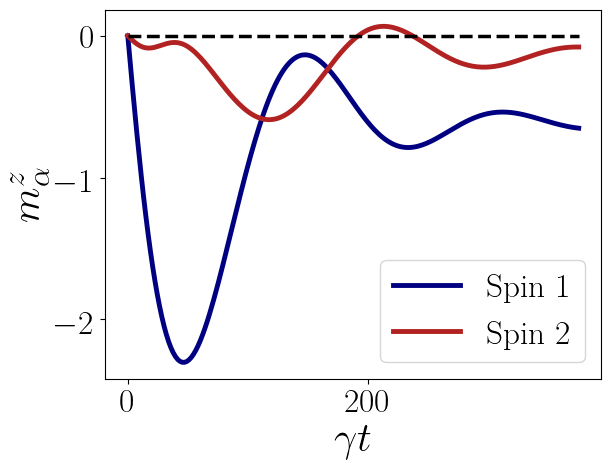

In [74]:

plt.plot(tim,result0.expect[0],label=r'Spin 1', linewidth=3.5, color='navy')
plt.plot(tim,result0.expect[1],label=r'Spin 2', linewidth=3.5, color='firebrick')
# plt.plot(tim, data_mf1, lw=3, color='navy', linestyle='--', alpha=0.2)
# plt.plot(tim, data_mf2, lw=3, color='red', linestyle='--', alpha=0.2)   

plt.plot(tim,0*tim,linestyle='--', lw=2.5, color='black')
plt.ylabel(r'$m^z_{\alpha}$')
plt.xlabel(r'$\gamma t$')
plt.legend()
plt.show()

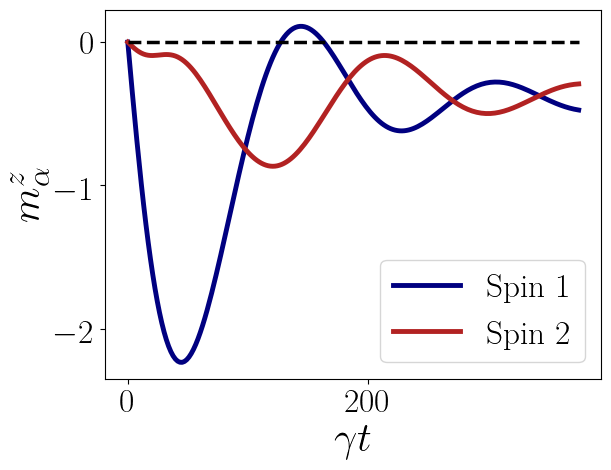

In [243]:

plt.plot(tim,result0.expect[0],label=r'Spin 1', linewidth=3.5, color='navy')
plt.plot(tim,result0.expect[1],label=r'Spin 2', linewidth=3.5, color='firebrick')
# plt.plot(tim, data_mf1, lw=3, color='navy', linestyle='--', alpha=0.2)
# plt.plot(tim, data_mf2, lw=3, color='red', linestyle='--', alpha=0.2)   

plt.plot(tim,0*tim,linestyle='--', lw=2.5, color='black')
plt.ylabel(r'$m^z_{\alpha}$')
plt.xlabel(r'$\gamma t$')
plt.legend()
plt.show()

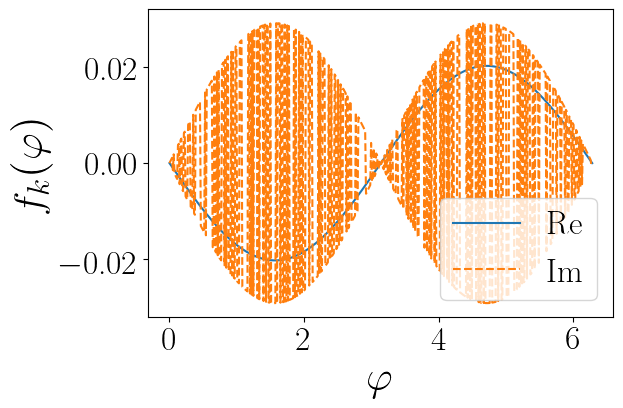

In [179]:
# --- simplest case: one spin in each species ---

N_A = N_B = 1
kappa = 1.0
g     = 0.1 * kappa
eta   = 0.7 * g

# rescaled rates
Gamma = 4 * g**2 / kappa
Xi    = 2 * g * eta / kappa

# define collective spin operators for A and B
Jp_A = tensor(jmat(N_A, '+'), qeye(2*N_B+1))
Jm_A = tensor(jmat(N_A, '-'), qeye(2*N_B+1))
Jx_A = tensor(jmat(N_A, 'x'), qeye(2*N_B+1))
Jy_A = tensor(jmat(N_A, 'y'), qeye(2*N_B+1))
Jz_A = tensor(jmat(N_A, 'z'), qeye(2*N_B+1))

Jp_B = tensor(qeye(2*N_A+1), jmat(N_B, '+'))
Jm_B = tensor(qeye(2*N_A+1), jmat(N_B, '-'))
Jx_B = tensor(qeye(2*N_A+1), jmat(N_B, 'x'))
Jy_B = tensor(qeye(2*N_A+1), jmat(N_B, 'y'))
Jz_B = tensor(qeye(2*N_A+1), jmat(N_B, 'z'))

# total spin operators (if needed)
Jx = Jx_A + Jx_B
Jy = Jy_A + Jy_B
Jz = Jz_A + Jz_B

# pick the observable to probe, e.g. Jx
O = Jx

# choose which Liouvillian eigenmode index to track
mode_index = 0   # adjust as desired

# phi sweep
phi_list = np.linspace(0, 2*np.pi, 500)
f_vals = np.zeros_like(phi_list, dtype=complex)

for idx, phi in enumerate(phi_list):
    # build Hamiltonian and collapse operators with phase phi
    H     = -Xi*(Jm_A + Jp_A + np.exp(-1j*phi)*Jm_B + np.exp(1j*phi)*Jp_B)
    c_ops = [ np.sqrt(Gamma) * (Jm_A + np.exp(-1j*phi)*Jm_B) ]
    
    # construct Liouvillian and diagonalize
    L      = liouvillian(H, c_ops)
    eigs, rvecs = L.eigenstates()
    
    # pick out the k-th right eigenvector and reshape to operator
    R_k = vector_to_operator(rvecs[mode_index])
    
    # compute expectation (i.e. trace) of O with R_k
    f_vals[idx] = (O * R_k).tr()

# plot real and imaginary parts of f_k(phi)
plt.figure(figsize=(6,4))
plt.plot(phi_list, f_vals.real, label='Re')
plt.plot(phi_list, f_vals.imag, '--', label='Im')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$f_k(\varphi)$')
plt.legend()

In [145]:
eigenmodes = [ vector_to_operator(r) for r in rvecs ]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

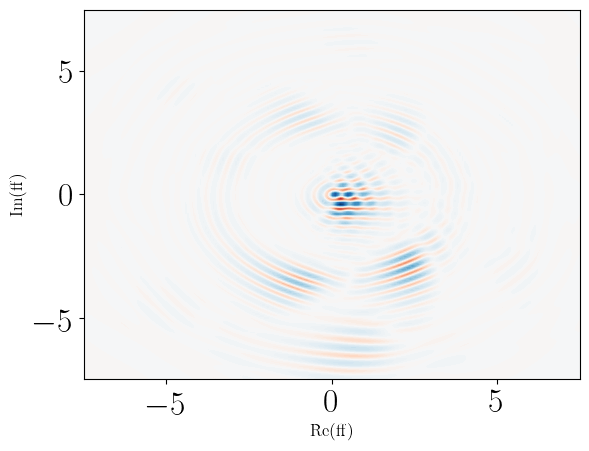

In [146]:
plot_wigner(eigenmodes[0])

In [270]:
###Original parameters
kappa = 1.0
g = 0.1*kappa

#Rescaled
Gamma = 4*g**2/kappa
Xi = 2*g*eta/kappa

DeltaA = 0 
DeltaB = 0

param_sets = [
    (0.9, 0.0),
    (0.9, 2*np.pi/3),
    (0.25, 2*np.pi/3),
]

Ns = [1,2,3]
n_eigs = 10

# Pre‑allocate: shape = (n_param_sets, n_Ns, n_eigs)
results = np.zeros((len(param_sets), len(Ns), n_eigs), dtype=complex)
for i,(eta, ϕ) in enumerate(param_sets):
    Xi    = 2 * g * eta / kappa
    Gamma = 4 * g**2 / kappa

    for j,N in enumerate(Ns):
        N_A = N_B = N 
        Jp_A=tensor(jmat(int(N_A),'+'),qeye(int(2*N_B+1)))
        Jm_A=tensor(jmat(int(N_A),'-'),qeye(int(2*N_B+1)))
        Jx_A=tensor(jmat(int(N_A),'x'),qeye(int(2*N_B+1)))
        Jy_A=tensor(jmat(int(N_A),'y'),qeye(int(2*N_B+1)))
        Jz_A=tensor(jmat(int(N_A),'z'),qeye(int(2*N_B+1)))

        Jp_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'+'))
        Jm_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'-'))
        Jx_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'x'))
        Jy_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'y'))
        Jz_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'z'))


        Jp=Jp_A+Jp_B
        Jm=Jm_A+Jm_B
        Jx=Jx_A+Jx_B
        Jy=Jy_A+Jy_B
        Jz=Jz_A+Jz_B

        J_sq_A = Jx_A**2 + Jy_A**2 + Jz_A**2
        J_sq_B = Jx_B**2 + Jy_B**2 + Jz_B**2
        J_sq_total = (Jx_A + Jx_B)**2 + (Jy_A + Jy_B)**2 + (Jz_A + Jz_B)**2


        H= - DeltaA * Jz_A - DeltaB * Jz_B +  Xi * (Jm_A + Jp_A + np.exp(-1j*ϕ)*Jm_B + np.exp(1j*ϕ)*Jp_B)

        c_ops=[np.sqrt(Gamma/N)*(Jm_A + np.exp(-1j*ϕ)*Jm_B)]
        
        # Construct the Liouvillian
        liouv = liouvillian(H, c_ops)
        
        # Compute eigenvalues and eigenvectors
        eigenvalues = liouv.eigenenergies(sparse=True, sort='high',eigvals=n_eigs, tol=1e-3)
        eigenvalues = np.sort_complex(eigenvalues)[::-1]

        # Store 
        results[i, j, :] = eigenvalues

In [280]:
real_parts1 = np.real(results[0, 2, :])
imag_parts1 = np.imag(results[0, 2, :])
real_parts2 = np.real(results[1, 2, :])
imag_parts2 = np.imag(results[1, 2, :])
real_parts3 = np.real(results[2, 2, :])
imag_parts3 = np.imag(results[2, 2, :])

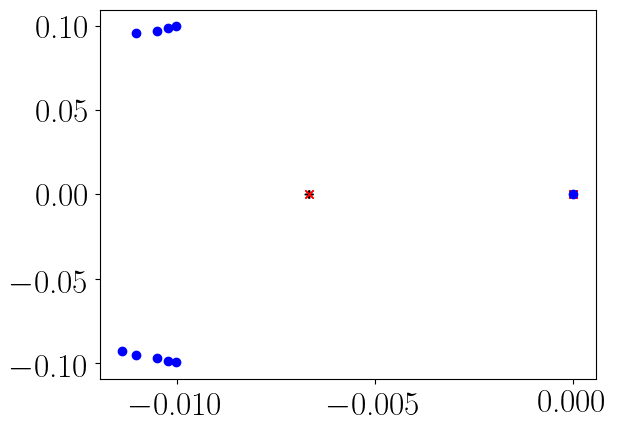

In [ ]:
plt.plot(real_parts1, imag_parts1, 'k+')    
plt.plot(real_parts2, imag_parts2, 'rx')
plt.plot(real_parts3, imag_parts3, 'bo')
# plt.xlim(-0.005,0)

In [ ]:
#save data and plot next to mf 

writedata = np.array([2*result0.expect[0]/N])
np.savetxt(f"dataN={N_A}.txt", writedata.T, header="m1", delimiter="\t")

In [ ]:
#Compare exact finsize with mean field 

data_q = np.loadtxt("data.txt");
data_mf = np.loadtxt("mf_data.txt");

plt.plot(tim, data_q, label=r'Exact $N=5$', linewidth=2.5)
plt.plot(tim, data_mf, label=r'$N\rightarrow\infty$', linewidth=2.5)
plt.legend()
plt.show()

Run dynamics and save data files for changing system sizes

In [49]:
###Original parameters
###Original parameters
kappa = 1.0
g = 0.1*kappa
eta = 1.5*g

#Rescaled
Gamma = 4*g**2/kappa
Xi = 2*g*eta/kappa

DeltaA = 0.1*g
DeltaB = 0.1*g

ϕ = 0         # Phase factor
tim = np.linspace(0, 15/Gamma, 200)  # Fixed time grid

# System sizes to simulate
N_values = [5, 10, 15, 20, 25, 30]

# Data storage structure
results = {
    'phase': ϕ,
    'N_values': N_values,
    'Jz_A': [],
    'Jz_B': []
}

In [50]:
for N in N_values:
    N_A = N_B = N  # Set current system size
    
    # Construct spin operators for current size
    Jm_A = tensor(jmat(N_A, '-'), qeye(2*N_B + 1))
    Jp_A = tensor(jmat(N_A, '+'), qeye(2*N_B + 1))
    Jz_A = tensor(jmat(N_A, 'z'), qeye(2*N_B + 1))
    
    Jm_B = tensor(qeye(2*N_A + 1), jmat(N_B, '-'))
    Jp_B = tensor(qeye(2*N_A + 1), jmat(N_B, '+'))
    Jz_B = tensor(qeye(2*N_A + 1), jmat(N_B, 'z'))

    # Hamiltonian
    H = (-DeltaA * Jz_A - DeltaB * Jz_B + 
         Xi * (Jm_A + Jp_A + np.exp(-1j*ϕ)*Jm_B + np.exp(1j*ϕ)*Jp_B))
    
    # Collapse operator
    c_ops = [np.sqrt(Gamma/(2*N)) * (Jm_A + np.exp(-1j*ϕ)*Jm_B)]
    
    # Initial state: coherent states along +x
    psi_A = spin_coherent(N_A, np.pi/2, 0)
    psi_B = spin_coherent(N_B, np.pi/2, 0)
    rho0 = tensor(psi_A, psi_B).proj()  # Density matrix
    
    # Run simulation
    print(f"Running N = {N}...")
    start = time.time()
    result = mesolve(H, rho0, tim, c_ops, [Jz_A, Jz_B])
    print(f"Completed in {time.time()-start:.2f} seconds\n")
    
    # Store results
    results['Jz_A'].append(result.expect[0])
    results['Jz_B'].append(result.expect[1])

# Convert to numpy arrays for easier saving/loading
results['Jz_A'] = np.array(results['Jz_A'])
results['Jz_B'] = np.array(results['Jz_B'])

# Save data
np.savez(f'../finsize_data/spin_dynamics_ϕ{ϕ}_Delta{DeltaA}.npz', 
         phase=results['phase'],
         N_values=results['N_values'],
         Jz_A=results['Jz_A'],
         Jz_B=results['Jz_B'])

Running N = 5...
Completed in 2.31 seconds

Running N = 10...
Completed in 97.18 seconds

Running N = 15...
Completed in 464.60 seconds

Running N = 20...
Completed in 1524.20 seconds

Running N = 25...
Completed in 5402.44 seconds

Running N = 30...
Completed in 11240.31 seconds



To load and analyze the data...

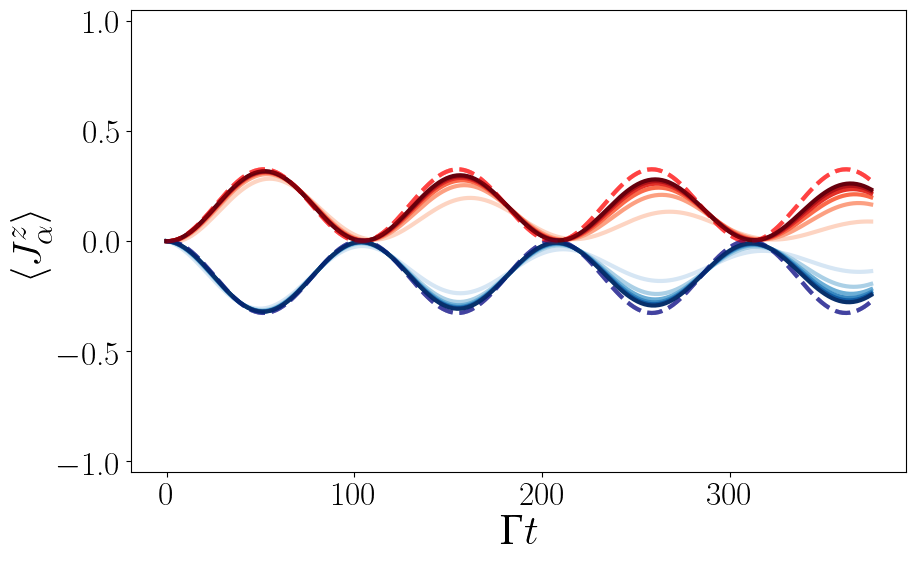

In [13]:
ϕ = np.pi
DeltaA = 0.01
data = np.load(f'../finsize_data/spin_dynamics_ϕ{ϕ}_Delta{DeltaA}.npz', allow_pickle=True)
data_mf1 = np.loadtxt("../finsize_data/mf_data3s1.txt")
data_mf2 = np.loadtxt("../finsize_data/mf_data3s2.txt")
# Access results
time = tim 
N_values = data['N_values']
Jz_A = data['Jz_A'] 
Jz_B = data['Jz_B']  

colorlistA = plt.get_cmap('Blues', 1+len(N_values))
colorlistB = plt.get_cmap('Reds', 1+len(N_values))

plt.figure(figsize=(10, 6))
for n_index in range(len(N_values)):
    plt.plot(time, Jz_A[n_index]/N_values[n_index],  lw=3, color= colorlistA(1+n_index))# label=f'$N = {N_values[n_index]}$',)
    plt.plot(time, Jz_B[n_index]/N_values[n_index], lw=3, color= colorlistB(1+n_index))
    plt.plot(time, data_mf1, lw=3, color='navy', linestyle='--', alpha=0.2)
    plt.plot(time, data_mf2, lw=3, color='red', linestyle='--', alpha=0.2)   
    plt.xlabel(r'$\Gamma t$')
    plt.ylabel(r'$\langle J^z_\alpha \rangle $')
    plt.ylim(-1.05,1.05)
    plt.yticks(np.arange(-1, 1.1, 0.5))

# plt.legend()
# plt.savefig(f'../finsize_data/spin_dynamics_phi{ϕ}_Delta{DeltaA}.pdf', bbox_inches='tight')

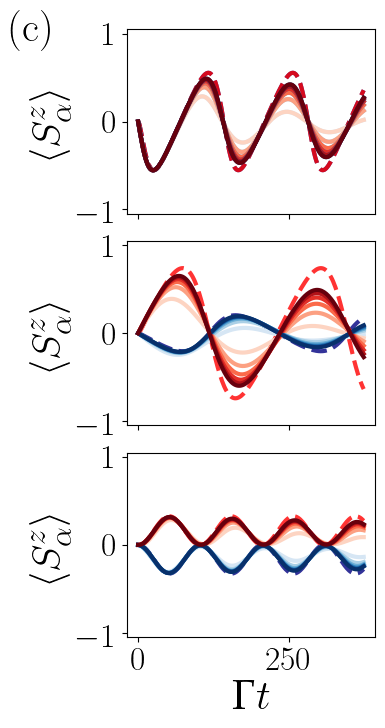

In [43]:
phi_list    = [0, 4/5 * np.pi, np.pi]
deltaA_list = [0, 0, 0.01]

# Pre‐load the three sets of mean‐field data
data1_mf1 = np.loadtxt("../finsize_data/mf_data1s1.txt")
data1_mf2 = np.loadtxt("../finsize_data/mf_data1s2.txt")

data2_mf1 = np.loadtxt("../finsize_data/mf_data2s1.txt")
data2_mf2 = np.loadtxt("../finsize_data/mf_data2s2.txt")

data3_mf1 = np.loadtxt("../finsize_data/mf_data3s1.txt")
data3_mf2 = np.loadtxt("../finsize_data/mf_data3s2.txt")

mf_data_list = [
    (data1_mf1, data1_mf2),
    (data2_mf1, data2_mf2),
    (data3_mf1, data3_mf2),
]

# Make a single figure with 3 rows, 1 column, sharing the x‐axis
fig, axes = plt.subplots(
    nrows=3,
    ncols=1,
    sharex=True,
    figsize=(4, 7.5
    ),   # tall figure so each panel has room
)

# If you want each panel to have the same y‐limits/ticks, set them here:
ymin, ymax = -1.05, 1.05
yticks     = np.arange(-1, 1.1, 1.0)

time = tim  # assuming `tim` is already defined as your time array

for ax, (ϕ, DeltaA, (mf1, mf2)) in zip(axes, zip(phi_list, deltaA_list, mf_data_list)):
    # Load your data for this panel:
    data = np.load(
        f"../finsize_data/spin_dynamics_ϕ{ϕ}_Delta{DeltaA}.npz",
        allow_pickle=True
    )
    N_values = data['N_values']
    Jz_A     = data['Jz_A']
    Jz_B     = data['Jz_B']

    # Make a color map for each species in this panel
    colorlistA = plt.get_cmap('Blues', 1 + len(N_values))
    colorlistB = plt.get_cmap('Reds',  1 + len(N_values))

    ax.plot(
        time,
        mf1,
        lw=3,
        color='navy',
        linestyle='--',
        alpha=0.8,
    )
    ax.plot(
        time,
        mf2,
        lw=3,
        color='red',
        linestyle='--',
        alpha=0.8,
    )

    # Plot each N‐value curve on this axis
    for n_index in range(len(N_values)):
        ax.plot(
            time,
            Jz_A[n_index] / N_values[n_index],
            lw=3,
            color=colorlistA(1 + n_index)
        )
        ax.plot(
            time,
            Jz_B[n_index] / N_values[n_index],
            lw=3,
            color=colorlistB(1 + n_index)
        )


    # Set y‐labels, y‐limits, and ticks
    ax.set_ylabel(r'$\langle S^z_\alpha \rangle$')
    ax.set_ylim(ymin, ymax)
    ax.set_yticks(yticks)

# Only the bottom panel gets the shared x‐axis label
axes[-1].set_xlabel(r'$\Gamma t$')

# Optional: adjust spacing so titles/labels don’t overlap
fig.tight_layout(h_pad=0.25)

fig.text(
    0.02,           # 2% from left
    0.98,           # 98% from bottom (i.e. just under the top edge)
    '(c)',
    fontsize=30,
    fontweight='bold',
    va='top'
)

# plt.show()

plt.savefig(f'../figs_for_paper/fig2_2.svg', bbox_inches='tight')